<a href="https://colab.research.google.com/github/RoyPoulami/X-axis-parameter-generation-Neurokit/blob/main/Automation_of_X_axis_parameters_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

!curl -fsSL -o /tmp/colab-ssh.py https://git.io/JUkot
%run /tmp/colab-ssh.py

!mkdir -p ~/.google/carditek-ecg
!cp /content/drive/MyDrive/Colaboratory/dot-google/client_secret.json ~/.google/carditek-ecg

!pip install -U git+ssh://git@github.com/carditek-cloud/python-client.git > /dev/null

from carditek.cloud.client import Buffer, Client
client = Client()

workspace ='/content/drive/My Drive/Colaboratory/Carditek TIFF Files/'
background = '/content/drive/My Drive/Colaboratory/Carditek TIFF Files'
import sys; sys.path.append(workspace)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Password for ~/.ssh/id_carditek: ··········
  Running command git clone -q 'ssh://****@github.com/carditek-cloud/python-client.git' /tmp/pip-req-build-1wrtxfm8


In [ ]:
!pip install neurokit2
from google.colab import files
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal
from scipy import signal as sp
from PIL import Image, ImageDraw, ImageFont
from scipy.signal import medfilt,lfilter,butter,filtfilt,spectrogram,periodogram,welch
import os
# Load NeuroKit and other useful packages
import neurokit2 as nk
import seaborn as sns
import statistics as st
%matplotlib inline
import collections
import math
from math import nan
# ######## MacId and Timestamp ########
def getMacId(xrow,xcolumn):
  macId=sbs.cell(xrow,xcolumn).value
  return(macId)
def gettimestamp(xrow,xcolumn):
  xcolumn=xcolumn+1
  ts=int(sbs.cell(xrow,xcolumn).value)
  return(ts)

##SETTING UP FILTER 
def ecg_filters(lead_data):
  d, c = sp.butter(3, [45/500] , btype='low', analog=False)
  #d = signal.firwin(511, cutoff = [150/500], window = "hamming", pass_zero=True); a = 1
  b = signal.firwin(1735, cutoff = [0.8/500], window = "hamming", pass_zero=False); a = 1
  #b, a = sp.butter(5, [0.5/500] , btype='high', analog=False)
  filt_BW = sp.filtfilt(b, a, lead_data)
  filt_45 = sp.lfilter(d, c, filt_BW)
  return filt_45

#function for data dictonary 
def Value_axis(data_dict,value):
  data=list(data_dict.items())
  an_array=np.array(data)
  Values_1=an_array[value]
  Values_2=np.asarray(Values_1[1])
  return Values_2

# Function for average interval calculation by neglecting nan elements 
def avg_intervalcalculation(start_pt,stop_pt):
  count=0;interval_average=0
  for d in range(0,min(len(start_pt),len(stop_pt))):
    if np.isnan(start_pt[d])!=True and np.isnan(stop_pt[d])!=True:
      interval_average=interval_average+(stop_pt[d]-start_pt[d])
      count=count+1
  interval_average=interval_average/count
  return(interval_average)

# Function for average internal calculation by neglecting extra element 
# def data_calculation(st_p,en_p):
#   count=0;duration_avg=0
#   for p in range(0,len(st_p)):
#     if np.isnan(st_p[p])==False and np.isnan(en_p[p])==False:
#       duration_avg=duration_avg+(en_p[p]-st_p[p])
#       count=count=1
#   duration_avg=duration_avg/count
#   return(duration_avg)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
####   TO READ AND WRITE DATA ONTO SHEETS THE API AND LIBRARIES #####
from google.colab import auth
auth.authenticate_user() 
import gspread
from oauth2client.client import GoogleCredentials

!pip install --upgrade gsheets 

import gspread
from google.auth import default
creds, _ = default()

################### MOUNT THE SHEET ####################
gc = gspread.authorize(creds)
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1tbtREQGdCZqSWzzSgLZWeiUSLUEYDJV9z8ULgSVVXw4/edit?usp=sharing')      #sheet
sbs = sh.worksheet('PATCH_1')   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# # Retrieve ECG data from data folder (sampling rate= 1000 Hz)
# #ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# # Extract R-peaks locations
# Fs=1000
# ##################################
# trialId = 'CK1501'
# name = ' Meenakshi'
# ts =1656139560 
# # macId = 'E4:E1:12:C4:CD:E1'
# # macId = 'E4:E1:12:C4:CD:F0'
# macId = '24:9F:89:20:18:28'
# # macId = 'E4:E1:12:C4:CD:DE'
# # macId = '24:9F:89:20:18:4A'
# # macId ='E4:E1:12:C4:CD:90'
# #macId='E4:E1:12:C4:CD:B6'

# #####################################

# ECG_Type = "12 Lead ECG"
# #Patient_Details = ("Trial ID :  %s \nName :  %s  \nTimestamp :  %d  \nMAC :  %s"%(trialId,name,ts,macId))
# Patient_Details = ("Trial ID :  %s \nTimestamp :  %d  \nMAC :  %s"%(trialId,ts,macId))
# #MAC_and_TS = (str(MacID)+'/'+str(Timestamp))
# file_name = str(trialId)
# start = 3000

# #buffer = client.fetch(str(macId),int(Timestamp[0]))
# buffer = client.fetch(macId,ts)
# frame = buffer.frame

# Leadi= frame.i
# Leadii=frame.ii
# #V1=frame.v1
# V2=frame.v2
# # V3=frame.v3
# #V4=frame.v4
# #V5=frame.v5
# #V6=frame.v6

# # i =  Leadi*0.000286
# ii= Leadii*0.000286
# #ecg_signal =  V1*0.000286
# ecg_signal =  V2*0.000286
# # ecg_signal =  V3*0.000286
# #ecg_signal =  V4*0.000286
# #ecg_signal =  V5*0.000286
# #ecg_signal =  V6*0.000286

# ecg_signal = ecg_filters(V2)
# # ecg_signal= ecg_filters(ii)
# #ii = ecg_filters(Lead2)
# plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

In [ ]:
# def Rhythm_Check(lead_data):
#   b = signal.firwin(1735, cutoff = [3/500], window = "hamming", pass_zero=False); a = 1 ;  filt_BW = sp.filtfilt(b, a, lead_data)
#   d, c = sp.butter(15, [35/500] , btype='low', analog=False); filtered = sp.lfilter(d, c, filt_BW);filtered = filtered*filtered;
#   peaks,rpeak = sp.find_peaks(filtered,distance = 400,height=(max(filtered[1000:5000])/4))
#   RR_int = []
#   for j in range (0,len(peaks)-1):
#     diff = (peaks[j+1]) - (peaks[j])
#     RR_int.append(diff)
#   st_dev = np.std(RR_int)
#   # print(st_dev)  ### standard deviation checking
#   # plt.figure(figsize=(33.0,5.5))
#   # plt.plot(lead_data)
#   # plt.plot(peaks,lead_data[peaks],'o')    #  #  #  #  # to check the marking of QRS
#   # if (st_dev<120 and st_dev>2):
#   if (st_dev<120):
#     print('Regular Rhythm')
#     # plt.title('Regular Rhythm',fontsize=25)
#   else:
#     print('Irregular Rhythm')
#   #   plt.title('Irregular Rhythm',fontsize=25)
#   # plt.xlim([0,15000]);
#   # plt.xticks(np.arange(0, len(lead_data), step=(len(lead_data)/75)));plt.grid()

# Rhythm_Check(Leadii)




Regular Rhythm


In [ ]:
# peaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=Fs)
# R_peak=peaks.ECG_R_Peaks; peak=[]
# for k in range(len(R_peak)):
#     peak.append(R_peak[k])
# df = pd.DataFrame.from_dict(info); #print(df)
# peaklocations = df.ECG_R_Peaks; IntRR=np.empty(len(peaklocations)-1)
# for i in range(1,len(peaklocations)):
#     ch = peaklocations[i]-peaklocations[i-1]
#     if ch<2000: IntRR[i-1] = ch;
# for j in range(0,len(IntRR)-1):
#     if IntRR[j]<=500: IntRR[j]=st.mean([IntRR[j-1],IntRR[j+1]])
# avg_RR = np.mean(IntRR); print('AVG RR:',int(avg_RR))
# HeartRate = (60*Fs)/avg_RR; print("HR:",int(HeartRate))

 


AVG RR: 993
HR: 60


MAC: 24:9F:89:20:18:5A
TS: 1642479375


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1595, 2174, 3539, 4287, 5096, 5995, 6866, nan, 8619, 8982, 10024, 10963, 12020, 12695, 13860, 14634])]
 ['ECG_P_Peaks'
  list([1644, 2247, 3556, 4312, 5131, 6033, 6897, 7559, 8643, 9006, 10088, 11007, 12037, 12735, 13955, 14657])]
 ['ECG_P_Offsets'
  list([1716, 2270, 3583, 4341, 5150, 6043, 6941, 7591, 8668, 9030, 10129, 11026, 12076, 12771, 14016, 14676])]
 ['ECG_Q_Peaks'
  list([911, 1753, 2699, 3659, 4462, 5223, 6106, 7050, 8011, 8831, 9395, 10379, 11280, 12204, 13044, 13945, 14729])]
 ['ECG_R_Onsets'
  list([902, 1804, 2686, 3706, 4450, 5234, 6116, 7038, 7998, 8817, 9602, 10367, 11265, 12197, 13096, 13959, 14741])]
 ['ECG_R_Offsets'
  list([1025, 1923, nan, 3766, 4551, 5311, 6239, 7136, 8121, 8940, 9678, 10494, 11330, 12258, 13173, 14050, 14843])]
 ['ECG_S_Peaks'
  list([1012, 1905, 2774, 3747, 4536, 5334, 6223, 7171, 8107, 8919, 9736, 10479, 11321, 12244, 13195, 14030, 14829])]
 ['ECG_T_Onsets'
  list([1082, 1904, 2874, 3910, 4608, 5413, 6129, nan, 8390, 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1595, 2174, 3539, 4287, 5096, 5995, 6866, nan, 8619, 8982, 10024, 10963, 12020, 12695, 13860, 14634])]
 ['ECG_P_Peaks'
  list([1644, 2247, 3556, 4312, 5131, 6033, 6897, 7559, 8643, 9006, 10088, 11007, 12037, 12735, 13955, 14657])]
 ['ECG_P_Offsets'
  list([1716, 2270, 3583, 4341, 5150, 6043, 6941, 7591, 8668, 9030, 10129, 11026, 12076, 12771, 14016, 14676])]
 ['ECG_Q_Peaks'
  list([911, 1753, 2699, 3659, 4462, 5223, 6106, 7050, 8011, 8831, 9395, 10379, 11280, 12204, 13044, 13945, 14729])]
 ['ECG_R_Onsets'
  list([902, 1804, 2686, 3706, 4450, 5234, 6116, 7038, 7998, 8817, 9602, 10367, 11265, 12197, 13096, 13959, 14741])]
 ['ECG_R_Offsets'
  list([1025, 1923, nan, 3766, 4551, 5311, 6239, 7136, 8121, 8940, 9678, 10494, 11330, 12258, 13173, 14050, 14843])]
 ['ECG_S_Peaks'
  list([1012, 1905, 2774, 3747, 4536, 5334, 6223, 7171, 8107, 8919, 9736, 10479, 11321, 12244, 13195, 14030, 14829])]
 ['ECG_T_Onsets'
  list([1082, 1904, 2874, 3910, 4608, 5413, 6129, nan, 8390, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14066]
QRS duration 96
PR_duration 205
QT duration 294
QTc interval 310
4


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1596, 2641, 3675, 4734, 5797, 6734, 7791, 8821, 9851, 10945, 11115, 11902, 12759, 13939])]
 ['ECG_P_Peaks'
  list([1653, 2684, 3691, 4760, 5821, 6750, 7844, 8863, 9883, 10966, 11215, 11934, 12817, 13976])]
 ['ECG_P_Offsets'
  list([1664, nan, 3712, 4777, nan, 6769, 7889, 8913, 9902, nan, 11230, 11971, 12843, 14011])]
 ['ECG_Q_Peaks'
  list([709, 1743, 2758, 3791, 4849, 5859, 6910, 7947, 8952, 9999, 11035, 11586, 12004, 13033, 14086])]
 ['ECG_R_Onsets'
  list([735, 1706, 2735, 3779, 4839, 5871, 6897, 7958, 8963, 9990, 11020, 11574, 12026, 13047, 14073])]
 ['ECG_R_Offsets'
  list([nan, nan, 2877, nan, 4974, 5955, 7041, 8034, nan, nan, 11109, 11625, nan, 13179, 14220])]
 ['ECG_S_Peaks'
  list([793, 1817, 2818, 3849, 4918, 5944, 6980, 8023, 9033, 10051, 11097, 11615, 12114, 13124, 14159])]
 ['ECG_T_Onsets'
  list([807, 1828, 2829, nan, 4929, nan, 6993, 8045, nan, nan, 11115, 11641, 12123, 13134])]
 ['ECG_T_Peaks'
  list([896, 1918, 2929, 4011, 5011, 6084, 7089, 814

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1596, 2641, 3675, 4734, 5797, 6734, 7791, 8821, 9851, 10945, 11115, 11902, 12759, 13939])]
 ['ECG_P_Peaks'
  list([1653, 2684, 3691, 4760, 5821, 6750, 7844, 8863, 9883, 10966, 11215, 11934, 12817, 13976])]
 ['ECG_P_Offsets'
  list([1664, nan, 3712, 4777, nan, 6769, 7889, 8913, 9902, nan, 11230, 11971, 12843, 14011])]
 ['ECG_Q_Peaks'
  list([709, 1743, 2758, 3791, 4849, 5859, 6910, 7947, 8952, 9999, 11035, 11586, 12004, 13033, 14086])]
 ['ECG_R_Onsets'
  list([735, 1706, 2735, 3779, 4839, 5871, 6897, 7958, 8963, 9990, 11020, 11574, 12026, 13047, 14073])]
 ['ECG_R_Offsets'
  list([nan, nan, 2877, nan, 4974, 5955, 7041, 8034, nan, nan, 11109, 11625, nan, 13179, 14220])]
 ['ECG_S_Peaks'
  list([793, 1817, 2818, 3849, 4918, 5944, 6980, 8023, 9033, 10051, 11097, 11615, 12114, 13124, 14159])]
 ['ECG_T_Onsets'
  list([807, 1828, 2829, nan, 4929, nan, 6993, 8045, nan, nan, 11115, 11641, 12123, 13134])]
 ['ECG_T_Peaks'
  list([896, 1918, 2929, 4011, 5011, 6084, 7089, 814

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13400]
QRS duration 111
PR_duration 123
QT duration 223
QTc interval 225
5


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1403, 2416, 3397, 4309, 5184, 6011, 6849, 7660, 8495, 9402, 10291, 11142, 12008, 12916, 13777, 14572])]
 ['ECG_P_Peaks'
  list([1419, 2435, 3413, 4352, 5231, 6053, 6882, 7714, 8557, 9421, 10318, 11183, 12058, 12948, 13799, 14629])]
 ['ECG_P_Offsets'
  list([1453, 2475, 3446, 4379, 5272, 6080, 6914, 7756, 8589, 9463, 10351, 11218, 12105, 12981, 13837, 14667])]
 ['ECG_Q_Peaks'
  list([513, 1522, 2546, 3526, 4458, 5287, 6151, 6971, 7765, 8669, 9531, 10429, 11289, 12167, 13058, 13910, 14741])]
 ['ECG_R_Onsets'
  list([494, 1510, 2528, 3510, 4445, 5327, 6130, 6958, 7797, 8649, 9493, 10414, 11270, 12151, 13042, 13880, 14729])]
 ['ECG_R_Offsets'
  list([605, 1604, 2624, 3610, 4540, 5418, 6239, 7051, 7902, 8752, 9609, 10509, 11369, 12247, 13139, 14004, 14821])]
 ['ECG_S_Peaks'
  list([579, 1578, 2598, 3582, 4510, 5390, 6200, 7024, 7871, 8721, 9585, 10484, 11344, 12223, 13113, 13965, 14793])]
 ['ECG_T_Onsets'
  list([736, 1689, 2684, 3703, 4631, 5503, 6209, 7139, 7988, 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1403, 2416, 3397, 4309, 5184, 6011, 6849, 7660, 8495, 9402, 10291, 11142, 12008, 12916, 13777, 14572])]
 ['ECG_P_Peaks'
  list([1419, 2435, 3413, 4352, 5231, 6053, 6882, 7714, 8557, 9421, 10318, 11183, 12058, 12948, 13799, 14629])]
 ['ECG_P_Offsets'
  list([1453, 2475, 3446, 4379, 5272, 6080, 6914, 7756, 8589, 9463, 10351, 11218, 12105, 12981, 13837, 14667])]
 ['ECG_Q_Peaks'
  list([513, 1522, 2546, 3526, 4458, 5287, 6151, 6971, 7765, 8669, 9531, 10429, 11289, 12167, 13058, 13910, 14741])]
 ['ECG_R_Onsets'
  list([494, 1510, 2528, 3510, 4445, 5327, 6130, 6958, 7797, 8649, 9493, 10414, 11270, 12151, 13042, 13880, 14729])]
 ['ECG_R_Offsets'
  list([605, 1604, 2624, 3610, 4540, 5418, 6239, 7051, 7902, 8752, 9609, 10509, 11369, 12247, 13139, 14004, 14821])]
 ['ECG_S_Peaks'
  list([579, 1578, 2598, 3582, 4510, 5390, 6200, 7024, 7871, 8721, 9585, 10484, 11344, 12223, 13113, 13965, 14793])]
 ['ECG_T_Onsets'
  list([736, 1689, 2684, 3703, 4631, 5503, 6209, 7139, 7988, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14228]
QRS duration 100
PR_duration 126
QT duration 328
QTc interval 341
6


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([930, 1538, 2155, 2776, 3388, 3990, 4604, 5208, 5851, 6435, 7071, 7674, 8294, 8892, 9532, 10146, 10738, 11342, 11968, 12590, 13209, 13811, 14414])]
 ['ECG_P_Peaks'
  list([973, 1602, 2189, 2799, 3409, 4030, 4645, 5261, 5875, 6494, 7106, 7717, 8313, 8961, 9554, 10167, 10779, 11390, 12019, 12618, 13240, 13850, 14466])]
 ['ECG_P_Offsets'
  list([1009, nan, 2234, 2845, 3469, 4068, 4696, 5300, 5920, 6545, 7149, 7765, 8371, 8990, 9609, 10226, 10795, 11449, 12061, 12679, 13281, 13899, 14505])]
 ['ECG_Q_Peaks'
  list([443, 1053, 1665, 2275, 2887, 3500, 4112, 4733, 5346, 5958, 6573, 7162, 7802, 8419, 9015, 9644, 10256, 10870, 11483, 12100, 12713, 13327, 13938, 14545])]
 ['ECG_R_Onsets'
  list([431, 1031, 1650, 2263, 2869, 3480, 4092, 4716, 5335, 5940, 6545, 7175, 7789, 8412, 9021, 9635, 10242, 10852, 11472, 12083, 12703, 13296, 13915, 14527])]
 ['ECG_R_Offsets'
  list([525, 1129, 1749, 2343, 2970, 3575, 4184, 4809, 5428, 6038, 6636, 7250, 7881, 8494, 9106, 9718, 10338, 1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([930, 1538, 2155, 2776, 3388, 3990, 4604, 5208, 5851, 6435, 7071, 7674, 8294, 8892, 9532, 10146, 10738, 11342, 11968, 12590, 13209, 13811, 14414])]
 ['ECG_P_Peaks'
  list([973, 1602, 2189, 2799, 3409, 4030, 4645, 5261, 5875, 6494, 7106, 7717, 8313, 8961, 9554, 10167, 10779, 11390, 12019, 12618, 13240, 13850, 14466])]
 ['ECG_P_Offsets'
  list([1009, nan, 2234, 2845, 3469, 4068, 4696, 5300, 5920, 6545, 7149, 7765, 8371, 8990, 9609, 10226, 10795, 11449, 12061, 12679, 13281, 13899, 14505])]
 ['ECG_Q_Peaks'
  list([443, 1053, 1665, 2275, 2887, 3500, 4112, 4733, 5346, 5958, 6573, 7162, 7802, 8419, 9015, 9644, 10256, 10870, 11483, 12100, 12713, 13327, 13938, 14545])]
 ['ECG_R_Onsets'
  list([431, 1031, 1650, 2263, 2869, 3480, 4092, 4716, 5335, 5940, 6545, 7175, 7789, 8412, 9021, 9635, 10242, 10852, 11472, 12083, 12703, 13296, 13915, 14527])]
 ['ECG_R_Offsets'
  list([525, 1129, 1749, 2343, 2970, 3575, 4184, 4809, 5428, 6038, 6636, 7250, 7881, 8494, 9106, 9718, 10338, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14233]
QRS duration 93
PR_duration 86
QT duration 320
QTc interval 386
7


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1573, 2375, 3256, 3969, 4771, 5587, 6393, 7179, 7994, 8802, 9623, 10436, 11246, 12145, 12864, 13695, 14506])]
 ['ECG_P_Peaks'
  list([1598, 2400, 3326, 3991, 4803, 5613, 6415, 7222, 8021, 8825, 9644, 10466, 11275, 12212, 12893, 13722, 14533])]
 ['ECG_P_Offsets'
  list([1616, 2422, 3356, 4018, 4818, 5648, 6438, 7234, 8052, 8860, 9666, 10502, 11293, 12242, 12905, 13766, 14562])]
 ['ECG_Q_Peaks'
  list([906, 1713, 2507, 3305, 4092, 4885, 5707, 6514, 7322, 8127, 8946, 9739, 10561, 11376, 12200, 12993, 13807, 14634])]
 ['ECG_R_Onsets'
  list([874, 1675, 2476, 3274, 4101, 4896, 5687, 6496, 7331, 8135, 8920, 9723, 10532, 11388, 12166, 12964, 13820, 14620])]
 ['ECG_R_Offsets'
  list([973, 1781, 2579, 3378, 4171, 4972, 5783, 6597, 7401, 8206, 9010, 9825, 10644, 11457, 12265, 13074, 13891, 14715])]
 ['ECG_S_Peaks'
  list([956, 1760, 2561, 3361, 4154, 4957, 5767, 6577, 7384, 8188, 8993, 9807, 10625, 11439, 12247, 13056, 13874, 14696])]
 ['ECG_T_Onsets'
  list([1151, 1952,

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1573, 2375, 3256, 3969, 4771, 5587, 6393, 7179, 7994, 8802, 9623, 10436, 11246, 12145, 12864, 13695, 14506])]
 ['ECG_P_Peaks'
  list([1598, 2400, 3326, 3991, 4803, 5613, 6415, 7222, 8021, 8825, 9644, 10466, 11275, 12212, 12893, 13722, 14533])]
 ['ECG_P_Offsets'
  list([1616, 2422, 3356, 4018, 4818, 5648, 6438, 7234, 8052, 8860, 9666, 10502, 11293, 12242, 12905, 13766, 14562])]
 ['ECG_Q_Peaks'
  list([906, 1713, 2507, 3305, 4092, 4885, 5707, 6514, 7322, 8127, 8946, 9739, 10561, 11376, 12200, 12993, 13807, 14634])]
 ['ECG_R_Onsets'
  list([874, 1675, 2476, 3274, 4101, 4896, 5687, 6496, 7331, 8135, 8920, 9723, 10532, 11388, 12166, 12964, 13820, 14620])]
 ['ECG_R_Offsets'
  list([973, 1781, 2579, 3378, 4171, 4972, 5783, 6597, 7401, 8206, 9010, 9825, 10644, 11457, 12265, 13074, 13891, 14715])]
 ['ECG_S_Peaks'
  list([956, 1760, 2561, 3361, 4154, 4957, 5767, 6577, 7384, 8188, 8993, 9807, 10625, 11439, 12247, 13056, 13874, 14696])]
 ['ECG_T_Onsets'
  list([1151, 1952,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14195]
QRS duration 91
PR_duration 126
QT duration 347
QTc interval 372
8


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1960, 2856, 3518, 5157, 6355, 7312, 8379, 9404, 10312, 11204, 12547, 13662, 14572])]
 ['ECG_P_Peaks'
  list([1995, 2899, 3576, 5195, 6374, 7338, 8402, 9455, 10344, 11215, 12573, 13699, 14598])]
 ['ECG_P_Offsets'
  list([2029, 2936, 3606, 5218, 6407, 7417, 8437, 9469, 10362, 11226, 12591, 13716, 14643])]
 ['ECG_Q_Peaks'
  list([1182, 2076, 2975, 3917, 5304, 6435, 7425, 8482, 9537, 10567, 11620, 12710, 13766, 14855])]
 ['ECG_R_Onsets'
  list([1198, 2123, 3009, 3927, 5321, 6424, 7436, 8462, 9559, 10554, 11609, 12702, 13789, 14870])]
 ['ECG_R_Offsets'
  list([1297, 2221, 3141, 4045, 5442, 6527, 7546, 8599, 9659, 10671, 11733, 12797, 13917, 14973])]
 ['ECG_S_Peaks'
  list([1265, 2193, 3093, 4008, 5402, 6498, 7511, 8564, 9623, 10636, 11679, 12769, 13879, 14936])]
 ['ECG_T_Onsets'
  list([1270, 2368, 3099, 4185, 5525, 6501, 7660, 8779, 9627, 10810, nan, 12773, 14024])]
 ['ECG_T_Peaks'
  list([1312, 2424, 3199, 4248, 5586, 6528, 7760, 8802, 9696, 10882, 11824, 12797, 1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1960, 2856, 3518, 5157, 6355, 7312, 8379, 9404, 10312, 11204, 12547, 13662, 14572])]
 ['ECG_P_Peaks'
  list([1995, 2899, 3576, 5195, 6374, 7338, 8402, 9455, 10344, 11215, 12573, 13699, 14598])]
 ['ECG_P_Offsets'
  list([2029, 2936, 3606, 5218, 6407, 7417, 8437, 9469, 10362, 11226, 12591, 13716, 14643])]
 ['ECG_Q_Peaks'
  list([1182, 2076, 2975, 3917, 5304, 6435, 7425, 8482, 9537, 10567, 11620, 12710, 13766, 14855])]
 ['ECG_R_Onsets'
  list([1198, 2123, 3009, 3927, 5321, 6424, 7436, 8462, 9559, 10554, 11609, 12702, 13789, 14870])]
 ['ECG_R_Offsets'
  list([1297, 2221, 3141, 4045, 5442, 6527, 7546, 8599, 9659, 10671, 11733, 12797, 13917, 14973])]
 ['ECG_S_Peaks'
  list([1265, 2193, 3093, 4008, 5402, 6498, 7511, 8564, 9623, 10636, 11679, 12769, 13879, 14936])]
 ['ECG_T_Onsets'
  list([1270, 2368, 3099, 4185, 5525, 6501, 7660, 8779, 9627, 10810, nan, 12773, 14024])]
 ['ECG_T_Peaks'
  list([1312, 2424, 3199, 4248, 5586, 6528, 7760, 8802, 9696, 10882, 11824, 12797, 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14158]
QRS duration 113
PR_duration 244
QT duration 284
QTc interval 279
9


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([1067, 1770, 2498, 3169, 3886, 4584, 5276, 5981, 6355, 7401, 8135, 8479, 9539, 10248, 10552, 11662, 11972, 12983, 13358, 14603])]
 ['ECG_P_Peaks'
  list([1128, 1807, 2521, 3204, 3923, 4616, 5297, 6027, 6432, 7439, 8153, 8552, 9564, 10264, 10647, 11681, 12056, 12995, 13458, 14654])]
 ['ECG_P_Offsets'
  list([1170, 1823, 2570, 3219, 3943, 4632, 5306, 6082, 6489, 7452, 8188, 8606, 9581, 10280, 10697, 11700, 12104, 13009, 13498, 14667])]
 ['ECG_Q_Peaks'
  list([509, 1243, 1940, 2650, 3353, 4048, 4742, 5412, 6157, 6854, 7551, 8241, 8973, 9696, 10335, 11065, 11767, 12467, 13113, 13886, 14774])]
 ['ECG_R_Onsets'
  list([519, 1233, 1930, 2637, 3338, 4038, 4733, 5429, 6147, 6848, 7536, 8224, 8953, 9676, 10348, 11052, 11758, 12455, 13158, 13914, 14764])]
 ['ECG_R_Offsets'
  list([634, 1335, 2053, 2749, 3407, 4114, 4837, 5562, 6265, 6925, 7639, 8343, 9075, 9779, 10427, 11147, 11887, 12550, 13239, 13988, 14859])]
 ['ECG_S_Peaks'
  list([576, 1288, 1989, 2690, 3382, 4088, 47

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1067, 1770, 2498, 3169, 3886, 4584, 5276, 5981, 6355, 7401, 8135, 8479, 9539, 10248, 10552, 11662, 11972, 12983, 13358, 14603])]
 ['ECG_P_Peaks'
  list([1128, 1807, 2521, 3204, 3923, 4616, 5297, 6027, 6432, 7439, 8153, 8552, 9564, 10264, 10647, 11681, 12056, 12995, 13458, 14654])]
 ['ECG_P_Offsets'
  list([1170, 1823, 2570, 3219, 3943, 4632, 5306, 6082, 6489, 7452, 8188, 8606, 9581, 10280, 10697, 11700, 12104, 13009, 13498, 14667])]
 ['ECG_Q_Peaks'
  list([509, 1243, 1940, 2650, 3353, 4048, 4742, 5412, 6157, 6854, 7551, 8241, 8973, 9696, 10335, 11065, 11767, 12467, 13113, 13886, 14774])]
 ['ECG_R_Onsets'
  list([519, 1233, 1930, 2637, 3338, 4038, 4733, 5429, 6147, 6848, 7536, 8224, 8953, 9676, 10348, 11052, 11758, 12455, 13158, 13914, 14764])]
 ['ECG_R_Offsets'
  list([634, 1335, 2053, 2749, 3407, 4114, 4837, 5562, 6265, 6925, 7639, 8343, 9075, 9779, 10427, 11147, 11887, 12550, 13239, 13988, 14859])]
 ['ECG_S_Peaks'
  list([576, 1288, 1989, 2690, 3382, 4088, 47

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14065]
QRS duration 101
PR_duration 127
QT duration 346
QTc interval 388
10


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1433, 2499, 3611, 4664, 5828, 6832, 7902, 8938, 9904, 11091, 12099, 13029, 14173])]
 ['ECG_P_Peaks'
  list([1502, 2558, 3668, 4709, 5850, 6851, 7934, 8991, 9963, 11115, 12147, 13059, 14198])]
 ['ECG_P_Offsets'
  list([1545, 2616, 3692, 4756, 5885, 6887, 7955, 9028, 9984, 11163, 12159, 13093, 14209])]
 ['ECG_Q_Peaks'
  list([493, 1552, 2668, 3701, 4806, 5896, 6962, 7993, 9062, 10176, 11222, 12250, 13283, 14215])]
 ['ECG_R_Onsets'
  list([474, 1590, 2676, 3749, 4793, 5906, 6942, 8017, 9109, 10186, 11233, 12280, 13332, 14385])]
 ['ECG_R_Offsets'
  list([573, 1678, 2767, 3846, 4916, 5992, 7065, 8139, 9201, 10268, 11322, 12388, 13425, 14478])]
 ['ECG_S_Peaks'
  list([552, 1655, 2744, 3823, 4895, 5969, 7040, 8116, 9177, 10247, 11301, 12360, 13402, 14453])]
 ['ECG_T_Onsets'
  list([686, 1771, 2930, 4070, 4964, 6191, 7234, 8294, 9311, 10390, 11341, 12466, 13663])]
 ['ECG_T_Peaks'
  list([785, 1833, 3013, 4115, 4994, 6258, 7302, 8383, 9354, 10421, 11380, 12510, 13685])]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1433, 2499, 3611, 4664, 5828, 6832, 7902, 8938, 9904, 11091, 12099, 13029, 14173])]
 ['ECG_P_Peaks'
  list([1502, 2558, 3668, 4709, 5850, 6851, 7934, 8991, 9963, 11115, 12147, 13059, 14198])]
 ['ECG_P_Offsets'
  list([1545, 2616, 3692, 4756, 5885, 6887, 7955, 9028, 9984, 11163, 12159, 13093, 14209])]
 ['ECG_Q_Peaks'
  list([493, 1552, 2668, 3701, 4806, 5896, 6962, 7993, 9062, 10176, 11222, 12250, 13283, 14215])]
 ['ECG_R_Onsets'
  list([474, 1590, 2676, 3749, 4793, 5906, 6942, 8017, 9109, 10186, 11233, 12280, 13332, 14385])]
 ['ECG_R_Offsets'
  list([573, 1678, 2767, 3846, 4916, 5992, 7065, 8139, 9201, 10268, 11322, 12388, 13425, 14478])]
 ['ECG_S_Peaks'
  list([552, 1655, 2744, 3823, 4895, 5969, 7040, 8116, 9177, 10247, 11301, 12360, 13402, 14453])]
 ['ECG_T_Onsets'
  list([686, 1771, 2930, 4070, 4964, 6191, 7234, 8294, 9311, 10390, 11341, 12466, 13663])]
 ['ECG_T_Peaks'
  list([785, 1833, 3013, 4115, 4994, 6258, 7302, 8383, 9354, 10421, 11380, 12510, 13685])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off []
QRS duration 99
PR_duration 198
QT duration 345
QTc interval 338
11


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1012, 1870, 2707, 3566, 4410, 5204, 5990, 6803, 7636, 8662, 9689, 10528, 11561, 12371, 13162, 14071])]
 ['ECG_P_Peaks'
  list([1064, 1889, 2730, 3591, 4436, 5237, 6021, 6841, 7665, 8708, 9729, 10551, 11577, 12399, 13181, 14103])]
 ['ECG_P_Offsets'
  list([1082, 1968, 2761, 3609, 4461, 5277, 6046, 6870, 7701, 8741, 9754, 10560, 11609, 12433, 13200, 14141])]
 ['ECG_Q_Peaks'
  list([233, 1118, 1977, 2842, 3663, 4527, 5348, 6133, 6913, 7737, 8819, 9840, 10785, 11666, 12509, 13330, 14193])]
 ['ECG_R_Onsets'
  list([282, 1145, 2008, 2830, 3690, 4537, 5338, 6122, 6924, 7768, 8808, 9832, 10774, 11656, 12499, 13320, 14183])]
 ['ECG_R_Offsets'
  list([367, 1245, 2108, 2930, 3775, 4619, 5421, 6221, 7024, 7849, 8893, 9913, 10858, 11743, 12583, 13404, 14284])]
 ['ECG_S_Peaks'
  list([343, 1219, 2066, 2900, 3753, 4603, 5400, 6189, 6996, 7825, 8877, 9887, 10841, 11727, 12562, 13383, 14258])]
 ['ECG_T_Onsets'
  list([491, 1336, 2196, 3033, 3875, 4747, 5516, 6321, 7168, 7895, 8

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1012, 1870, 2707, 3566, 4410, 5204, 5990, 6803, 7636, 8662, 9689, 10528, 11561, 12371, 13162, 14071])]
 ['ECG_P_Peaks'
  list([1064, 1889, 2730, 3591, 4436, 5237, 6021, 6841, 7665, 8708, 9729, 10551, 11577, 12399, 13181, 14103])]
 ['ECG_P_Offsets'
  list([1082, 1968, 2761, 3609, 4461, 5277, 6046, 6870, 7701, 8741, 9754, 10560, 11609, 12433, 13200, 14141])]
 ['ECG_Q_Peaks'
  list([233, 1118, 1977, 2842, 3663, 4527, 5348, 6133, 6913, 7737, 8819, 9840, 10785, 11666, 12509, 13330, 14193])]
 ['ECG_R_Onsets'
  list([282, 1145, 2008, 2830, 3690, 4537, 5338, 6122, 6924, 7768, 8808, 9832, 10774, 11656, 12499, 13320, 14183])]
 ['ECG_R_Offsets'
  list([367, 1245, 2108, 2930, 3775, 4619, 5421, 6221, 7024, 7849, 8893, 9913, 10858, 11743, 12583, 13404, 14284])]
 ['ECG_S_Peaks'
  list([343, 1219, 2066, 2900, 3753, 4603, 5400, 6189, 6996, 7825, 8877, 9887, 10841, 11727, 12562, 13383, 14258])]
 ['ECG_T_Onsets'
  list([491, 1336, 2196, 3033, 3875, 4747, 5516, 6321, 7168, 7895, 8

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13651]
QRS duration 89
PR_duration 145
QT duration 341
QTc interval 356
12


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1437, 2284, 3184, 3962, 4739, 5572, 6490, 7292, 8025, 8938, 9648, 10435, 11389, 12143, 12962, 13784, 14713])]
 ['ECG_P_Peaks'
  list([1460, 2308, 3197, 3990, 4774, 5617, 6506, 7316, 8056, 9001, 9663, 10464, 11461, 12190, 12983, 13808, 14727])]
 ['ECG_P_Offsets'
  list([1529, 2327, 3212, 4010, 4788, 5637, nan, nan, 8069, 9030, 9679, 10480, 11493, 12256, 13002, 13848, 14785])]
 ['ECG_Q_Peaks'
  list([827, 1568, 2413, 3272, 4103, 4913, 5726, 6567, 7372, 8175, 8990, 9800, 10583, 11435, 12286, 13118, 13970, 14797])]
 ['ECG_R_Onsets'
  list([811, 1598, 2427, 3262, 4092, 4904, 5736, 6555, 7363, 8158, 8947, 9786, 10567, 11445, 12272, 13107, 13959, 14768])]
 ['ECG_R_Offsets'
  list([895, 1714, 2519, 3354, 4186, 4996, 5812, 6639, 7445, 8259, 9059, 9872, 10658, 11527, 12361, 13182, 14053, 14877])]
 ['ECG_S_Peaks'
  list([871, 1682, 2491, 3331, 4149, 4958, 5786, 6619, 7420, 8225, 9033, 9843, 10633, 11497, 12337, 13163, 14012, 14848])]
 ['ECG_T_Onsets'
  list([1119, 1813, 2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1437, 2284, 3184, 3962, 4739, 5572, 6490, 7292, 8025, 8938, 9648, 10435, 11389, 12143, 12962, 13784, 14713])]
 ['ECG_P_Peaks'
  list([1460, 2308, 3197, 3990, 4774, 5617, 6506, 7316, 8056, 9001, 9663, 10464, 11461, 12190, 12983, 13808, 14727])]
 ['ECG_P_Offsets'
  list([1529, 2327, 3212, 4010, 4788, 5637, nan, nan, 8069, 9030, 9679, 10480, 11493, 12256, 13002, 13848, 14785])]
 ['ECG_Q_Peaks'
  list([827, 1568, 2413, 3272, 4103, 4913, 5726, 6567, 7372, 8175, 8990, 9800, 10583, 11435, 12286, 13118, 13970, 14797])]
 ['ECG_R_Onsets'
  list([811, 1598, 2427, 3262, 4092, 4904, 5736, 6555, 7363, 8158, 8947, 9786, 10567, 11445, 12272, 13107, 13959, 14768])]
 ['ECG_R_Offsets'
  list([895, 1714, 2519, 3354, 4186, 4996, 5812, 6639, 7445, 8259, 9059, 9872, 10658, 11527, 12361, 13182, 14053, 14877])]
 ['ECG_S_Peaks'
  list([871, 1682, 2491, 3331, 4149, 4958, 5786, 6619, 7420, 8225, 9033, 9843, 10633, 11497, 12337, 13163, 14012, 14848])]
 ['ECG_T_Onsets'
  list([1119, 1813, 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14099]
QRS duration 91
PR_duration 184
QT duration 284
QTc interval 307
13


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1509, 2084, 3087, 3876, 4444, 5379, 6183, 6988, 7753, 8507, 9347, 10144, 10939, 11754, 12521, 13332, 14110])]
 ['ECG_P_Peaks'
  list([1557, 2166, 3139, 3911, 4465, 5423, 6226, 7044, 7791, 8591, 9380, 10174, 10978, 11794, 12562, 13379, 14161])]
 ['ECG_P_Offsets'
  list([1591, 2188, 3176, 3936, 4534, 5471, 6283, 7076, 7859, 8609, 9424, 10195, 11005, 11816, 12624, 13399, 14198])]
 ['ECG_Q_Peaks'
  list([859, 1643, 2300, 3238, 3969, 4767, 5530, 6296, 7120, 7878, 8648, 9431, 10240, 11084, 11840, 12674, 13441, 14251])]
 ['ECG_R_Onsets'
  list([843, 1626, 2454, 3226, 3978, 4750, 5518, 6309, 7105, 7887, 8628, 9463, 10252, 11073, 11876, 12657, 13453, 14216])]
 ['ECG_R_Offsets'
  list([922, 1710, 2526, 3309, 4073, 4832, 5605, 6399, 7198, 7971, 8743, 9535, 10340, 11146, 11943, 12747, 13536, 14332])]
 ['ECG_S_Peaks'
  list([908, 1695, 2507, 3297, 4058, 4819, 5591, 6386, 7180, 7958, 8729, 9520, 10327, 11132, 11930, 12728, 13522, 14317])]
 ['ECG_T_Onsets'
  list([850, 2077, 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1509, 2084, 3087, 3876, 4444, 5379, 6183, 6988, 7753, 8507, 9347, 10144, 10939, 11754, 12521, 13332, 14110])]
 ['ECG_P_Peaks'
  list([1557, 2166, 3139, 3911, 4465, 5423, 6226, 7044, 7791, 8591, 9380, 10174, 10978, 11794, 12562, 13379, 14161])]
 ['ECG_P_Offsets'
  list([1591, 2188, 3176, 3936, 4534, 5471, 6283, 7076, 7859, 8609, 9424, 10195, 11005, 11816, 12624, 13399, 14198])]
 ['ECG_Q_Peaks'
  list([859, 1643, 2300, 3238, 3969, 4767, 5530, 6296, 7120, 7878, 8648, 9431, 10240, 11084, 11840, 12674, 13441, 14251])]
 ['ECG_R_Onsets'
  list([843, 1626, 2454, 3226, 3978, 4750, 5518, 6309, 7105, 7887, 8628, 9463, 10252, 11073, 11876, 12657, 13453, 14216])]
 ['ECG_R_Offsets'
  list([922, 1710, 2526, 3309, 4073, 4832, 5605, 6399, 7198, 7971, 8743, 9535, 10340, 11146, 11943, 12747, 13536, 14332])]
 ['ECG_S_Peaks'
  list([908, 1695, 2507, 3297, 4058, 4819, 5591, 6386, 7180, 7958, 8729, 9520, 10327, 11132, 11930, 12728, 13522, 14317])]
 ['ECG_T_Onsets'
  list([850, 2077, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13699]
QRS duration 86
PR_duration 146
QT duration 267
QTc interval 295
14


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([2095, 2832, 3793, 4912, 5861, 6693, 7694, 8734, 9633, 10621, 11591, 12497, 13522, 14564])]
 ['ECG_P_Peaks'
  list([2118, 2882, 3837, 4984, 5877, 6719, 7736, 8766, 9651, 10633, 11606, 12568, 13560, 14580])]
 ['ECG_P_Offsets'
  list([2144, 2900, 3853, 5024, 5902, 6777, 7754, 8785, 9694, 10657, 11620, 12582, 13595, 14609])]
 ['ECG_Q_Peaks'
  list([1094, 2080, 3038, 3942, 4968, 5912, 6832, 7873, 8907, 9799, 10719, 11786, 12695, 13677, 14691])]
 ['ECG_R_Onsets'
  list([1137, 2066, 3023, 3927, 4956, 5946, 6844, 7862, 8897, 9786, 10731, 11776, 12678, 13657, 14713])]
 ['ECG_R_Offsets'
  list([1230, 2170, 3124, 4052, 5052, 6068, 6951, 7974, 8997, 9890, 10848, 11867, 12800, 13778, 14796])]
 ['ECG_S_Peaks'
  list([1198, 2148, 3101, 4018, 5029, 6024, 6926, 7943, 8964, 9859, 10827, 11839, 12770, 13758, 14771])]
 ['ECG_T_Onsets'
  list([1207, 2357, 3190, 4027, 5149, 6032, 6934, nan, 8973, 9867, 10836, 12067, 13005, 13807])]
 ['ECG_T_Peaks'
  list([1273, 2399, 3223, 4084, 522

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([2095, 2832, 3793, 4912, 5861, 6693, 7694, 8734, 9633, 10621, 11591, 12497, 13522, 14564])]
 ['ECG_P_Peaks'
  list([2118, 2882, 3837, 4984, 5877, 6719, 7736, 8766, 9651, 10633, 11606, 12568, 13560, 14580])]
 ['ECG_P_Offsets'
  list([2144, 2900, 3853, 5024, 5902, 6777, 7754, 8785, 9694, 10657, 11620, 12582, 13595, 14609])]
 ['ECG_Q_Peaks'
  list([1094, 2080, 3038, 3942, 4968, 5912, 6832, 7873, 8907, 9799, 10719, 11786, 12695, 13677, 14691])]
 ['ECG_R_Onsets'
  list([1137, 2066, 3023, 3927, 4956, 5946, 6844, 7862, 8897, 9786, 10731, 11776, 12678, 13657, 14713])]
 ['ECG_R_Offsets'
  list([1230, 2170, 3124, 4052, 5052, 6068, 6951, 7974, 8997, 9890, 10848, 11867, 12800, 13778, 14796])]
 ['ECG_S_Peaks'
  list([1198, 2148, 3101, 4018, 5029, 6024, 6926, 7943, 8964, 9859, 10827, 11839, 12770, 13758, 14771])]
 ['ECG_T_Onsets'
  list([1207, 2357, 3190, 4027, 5149, 6032, 6934, nan, 8973, 9867, 10836, 12067, 13005, 13807])]
 ['ECG_T_Peaks'
  list([1273, 2399, 3223, 4084, 522

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13881]
QRS duration 106
PR_duration 189
QT duration 251
QTc interval 254
15


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1460, 2082, 2708, 3356, 4009, 4680, 5318, 5936, 6566, 7202, 7869, 8548, 9230, 9811, 10439, 11136, 11812, 12463, 13099, 13730, 14494])]
 ['ECG_P_Peaks'
  list([1498, 2117, 2744, 3418, 4049, 4718, 5349, 5982, 6608, 7229, 7897, 8573, 9249, 9845, 10480, 11180, 11891, 12528, 13135, 13764, 14512])]
 ['ECG_P_Offsets'
  list([1514, 2145, 2793, 3444, 4093, 4774, 5365, 6022, 6656, 7289, 7946, 8626, 9271, 9858, 10493, 11219, nan, nan, 13186, 13778, nan])]
 ['ECG_Q_Peaks'
  list([923, 1585, 2214, 2797, 3455, 4125, 4813, 5448, 6064, 6693, 7319, 7966, 8661, 9306, 9901, 10554, 11271, 11945, 12554, 13197, 13850, 14550])]
 ['ECG_R_Onsets'
  list([893, 1571, 2197, 2816, 3469, 4134, 4803, 5432, 6043, 6680, 7305, 7956, 8642, 9293, 9917, 10567, 11236, 11934, 12576, 13186, 13837, 14533])]
 ['ECG_R_Offsets'
  list([1041, 1692, 2336, 2930, 3579, 4241, 4906, 5555, 6183, 6797, 7447, 8092, 8767, 9414, 10040, 10668, 11379, 12047, 12695, 13320, 13959, 14665])]
 ['ECG_S_Peaks'
  list([1011,

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1460, 2082, 2708, 3356, 4009, 4680, 5318, 5936, 6566, 7202, 7869, 8548, 9230, 9811, 10439, 11136, 11812, 12463, 13099, 13730, 14494])]
 ['ECG_P_Peaks'
  list([1498, 2117, 2744, 3418, 4049, 4718, 5349, 5982, 6608, 7229, 7897, 8573, 9249, 9845, 10480, 11180, 11891, 12528, 13135, 13764, 14512])]
 ['ECG_P_Offsets'
  list([1514, 2145, 2793, 3444, 4093, 4774, 5365, 6022, 6656, 7289, 7946, 8626, 9271, 9858, 10493, 11219, nan, nan, 13186, 13778, nan])]
 ['ECG_Q_Peaks'
  list([923, 1585, 2214, 2797, 3455, 4125, 4813, 5448, 6064, 6693, 7319, 7966, 8661, 9306, 9901, 10554, 11271, 11945, 12554, 13197, 13850, 14550])]
 ['ECG_R_Onsets'
  list([893, 1571, 2197, 2816, 3469, 4134, 4803, 5432, 6043, 6680, 7305, 7956, 8642, 9293, 9917, 10567, 11236, 11934, 12576, 13186, 13837, 14533])]
 ['ECG_R_Offsets'
  list([1041, 1692, 2336, 2930, 3579, 4241, 4906, 5555, 6183, 6797, 7447, 8092, 8767, 9414, 10040, 10668, 11379, 12047, 12695, 13320, 13959, 14665])]
 ['ECG_S_Peaks'
  list([1011,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14188]
QRS duration 124
PR_duration 108
QT duration 357
QTc interval 414
16


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1101, 2009, 2790, 3330, 4080, 5032, 5878, 6659, 7414, 8189, 8906, 9587, 10280, 10957, 11685, 12420, 13110, 13696, 14563])]
 ['ECG_P_Peaks'
  list([1132, 2036, 2824, 3384, 4130, 5052, 5912, 6678, 7444, 8204, 8928, 9634, 10335, 11041, 11738, 12443, 13138, 13720, 14603])]
 ['ECG_P_Offsets'
  list([1143, 2081, 2857, 3408, 4163, 5065, 5930, 6717, 7464, 8230, 8965, 9665, 10354, 11055, 11795, 12484, 13199, 13738, 14681])]
 ['ECG_Q_Peaks'
  list([683, 1432, 2192, 2940, 3691, 4475, 5260, 5978, 6790, 7572, 8328, 9034, 9715, 10453, 11161, 11805, 12526, 13257, 13940, 14705])]
 ['ECG_R_Onsets'
  list([695, 1418, 2176, 2930, 3658, 4462, 5247, 6030, 6799, 7553, 8313, 9017, 9748, 10440, 11150, 11846, 12534, 13231, 13963, 14668])]
 ['ECG_R_Offsets'
  list([805, 1537, 2283, 3038, 3792, 4569, 5354, 6137, 6917, 7683, 8424, 9159, 9854, 10549, 11247, 11956, 12656, 13362, 14083, 14826])]
 ['ECG_S_Peaks'
  list([764, 1499, 2246, 3001, 3748, 4527, 5313, 6095, 6870, 7633, 8379, 9104, 98

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1101, 2009, 2790, 3330, 4080, 5032, 5878, 6659, 7414, 8189, 8906, 9587, 10280, 10957, 11685, 12420, 13110, 13696, 14563])]
 ['ECG_P_Peaks'
  list([1132, 2036, 2824, 3384, 4130, 5052, 5912, 6678, 7444, 8204, 8928, 9634, 10335, 11041, 11738, 12443, 13138, 13720, 14603])]
 ['ECG_P_Offsets'
  list([1143, 2081, 2857, 3408, 4163, 5065, 5930, 6717, 7464, 8230, 8965, 9665, 10354, 11055, 11795, 12484, 13199, 13738, 14681])]
 ['ECG_Q_Peaks'
  list([683, 1432, 2192, 2940, 3691, 4475, 5260, 5978, 6790, 7572, 8328, 9034, 9715, 10453, 11161, 11805, 12526, 13257, 13940, 14705])]
 ['ECG_R_Onsets'
  list([695, 1418, 2176, 2930, 3658, 4462, 5247, 6030, 6799, 7553, 8313, 9017, 9748, 10440, 11150, 11846, 12534, 13231, 13963, 14668])]
 ['ECG_R_Offsets'
  list([805, 1537, 2283, 3038, 3792, 4569, 5354, 6137, 6917, 7683, 8424, 9159, 9854, 10549, 11247, 11956, 12656, 13362, 14083, 14826])]
 ['ECG_S_Peaks'
  list([764, 1499, 2246, 3001, 3748, 4527, 5313, 6095, 6870, 7633, 8379, 9104, 98

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14275]
QRS duration 117
PR_duration 132
QT duration 331
QTc interval 368
17


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1153, 2175, 2577, 3529, nan, 4922, 5335, 6286, nan, 7677, 8358, 9122, 9471, 10567, 10875, 11851, 12210, 13258, 13982, 14673])]
 ['ECG_P_Peaks'
  list([1215, 2204, 2652, 3552, 4142, 4952, 5402, 6336, 6796, 7701, 8420, 9141, 9503, 10633, 10943, 11889, 12289, 13283, 14006, 14715])]
 ['ECG_P_Offsets'
  list([1232, 2227, 2669, 3573, 4190, 4971, 5471, 6366, 6860, 7750, 8436, 9183, 9519, 10667, 11006, 11903, 12355, 13299, 14023, 14738])]
 ['ECG_Q_Peaks'
  list([910, 1367, 2278, 2755, 3672, 4108, 5058, 5502, 6457, 6866, 7823, 8521, 9197, 9627, 10617, 11051, 12008, 12397, 13401, 14147, 14780])]
 ['ECG_R_Onsets'
  list([921, 1353, 2299, 2723, 3648, 4095, 5044, 5488, 6433, 6840, 7833, 8536, 9232, 9679, 10610, 11027, 11997, 12424, 13415, 14134, 14837])]
 ['ECG_R_Offsets'
  list([1031, 1472, 2411, 2883, 3788, 4235, 5155, 5635, 6540, 7026, 7923, 8643, 9330, 9813, 10715, 11165, 12098, 12566, 13508, 14230, 14944])]
 ['ECG_S_Peaks'
  list([985, 1461, 2376, 2851, 3746, 4377, 512

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1153, 2175, 2577, 3529, nan, 4922, 5335, 6286, nan, 7677, 8358, 9122, 9471, 10567, 10875, 11851, 12210, 13258, 13982, 14673])]
 ['ECG_P_Peaks'
  list([1215, 2204, 2652, 3552, 4142, 4952, 5402, 6336, 6796, 7701, 8420, 9141, 9503, 10633, 10943, 11889, 12289, 13283, 14006, 14715])]
 ['ECG_P_Offsets'
  list([1232, 2227, 2669, 3573, 4190, 4971, 5471, 6366, 6860, 7750, 8436, 9183, 9519, 10667, 11006, 11903, 12355, 13299, 14023, 14738])]
 ['ECG_Q_Peaks'
  list([910, 1367, 2278, 2755, 3672, 4108, 5058, 5502, 6457, 6866, 7823, 8521, 9197, 9627, 10617, 11051, 12008, 12397, 13401, 14147, 14780])]
 ['ECG_R_Onsets'
  list([921, 1353, 2299, 2723, 3648, 4095, 5044, 5488, 6433, 6840, 7833, 8536, 9232, 9679, 10610, 11027, 11997, 12424, 13415, 14134, 14837])]
 ['ECG_R_Offsets'
  list([1031, 1472, 2411, 2883, 3788, 4235, 5155, 5635, 6540, 7026, 7923, 8643, 9330, 9813, 10715, 11165, 12098, 12566, 13508, 14230, 14944])]
 ['ECG_S_Peaks'
  list([985, 1461, 2376, 2851, 3746, 4377, 512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14470]
QRS duration 121
PR_duration 142
QT duration 299
QTc interval 328
18


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1263, 2272, 3266, 4043, 5003, 5888, 6747, 7386, 8460, 9297, 10178, 11008, 11792, 12688, 13516, 14370])]
 ['ECG_P_Peaks'
  list([1306, 2308, 3290, 4070, 5037, 5920, 6822, 7444, 8507, 9390, 10212, 11054, 11837, 12719, 13561, 14446])]
 ['ECG_P_Offsets'
  list([1329, 2331, nan, 4107, 5072, 5957, 6919, 7499, 8546, nan, 10237, 11066, 11856, 12795, 13585, 14477])]
 ['ECG_Q_Peaks'
  list([292, 1374, 2416, 3304, 4209, 5090, 5970, 6857, 7697, 8598, 9459, 10303, 11145, 11985, 12810, 13651, 14513])]
 ['ECG_R_Onsets'
  list([320, 1408, 2405, 3330, 4232, 5076, 5981, 6846, 7686, 8587, 9449, 10293, 11134, 11976, 12820, 13661, 14502])]
 ['ECG_R_Offsets'
  list([446, 1510, 2530, 3451, 4371, 5223, 6104, 6984, 7844, 8708, 9570, 10413, 11256, 12099, 12924, 13767, 14625])]
 ['ECG_S_Peaks'
  list([392, 1465, 2474, 3399, 4303, 5171, 6048, 6926, 7791, 8658, 9517, 10362, 11210, 12052, 12887, 13728, 14572])]
 ['ECG_T_Onsets'
  list([400, 1472, 2482, 3406, 4311, 5179, 6143, 6934, 7799, 86

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1263, 2272, 3266, 4043, 5003, 5888, 6747, 7386, 8460, 9297, 10178, 11008, 11792, 12688, 13516, 14370])]
 ['ECG_P_Peaks'
  list([1306, 2308, 3290, 4070, 5037, 5920, 6822, 7444, 8507, 9390, 10212, 11054, 11837, 12719, 13561, 14446])]
 ['ECG_P_Offsets'
  list([1329, 2331, nan, 4107, 5072, 5957, 6919, 7499, 8546, nan, 10237, 11066, 11856, 12795, 13585, 14477])]
 ['ECG_Q_Peaks'
  list([292, 1374, 2416, 3304, 4209, 5090, 5970, 6857, 7697, 8598, 9459, 10303, 11145, 11985, 12810, 13651, 14513])]
 ['ECG_R_Onsets'
  list([320, 1408, 2405, 3330, 4232, 5076, 5981, 6846, 7686, 8587, 9449, 10293, 11134, 11976, 12820, 13661, 14502])]
 ['ECG_R_Offsets'
  list([446, 1510, 2530, 3451, 4371, 5223, 6104, 6984, 7844, 8708, 9570, 10413, 11256, 12099, 12924, 13767, 14625])]
 ['ECG_S_Peaks'
  list([392, 1465, 2474, 3399, 4303, 5171, 6048, 6926, 7791, 8658, 9517, 10362, 11210, 12052, 12887, 13728, 14572])]
 ['ECG_T_Onsets'
  list([400, 1472, 2482, 3406, 4311, 5179, 6143, 6934, 7799, 86

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13971]
QRS duration 124
PR_duration 152
QT duration 217
QTc interval 230
19


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1533, 2264, 3046, 3773, 4519, 5349, 6023, 6735, 7445, 8191, 8913, 9639, 10312, 11004, 11661, 12385, 13109, 13864, 14574])]
 ['ECG_P_Peaks'
  list([1581, 2314, 3062, 3828, 4558, 5418, 6044, 6781, 7534, 8234, 8944, 9683, 10366, 11030, 11720, 12412, 13145, 13884, 14638])]
 ['ECG_P_Offsets'
  list([1603, 2364, 3078, 3871, 4571, 5455, 6060, 6807, 7553, 8257, 8970, 9697, 10402, 11050, 11751, 12445, 13193, 13931, 14656])]
 ['ECG_Q_Peaks'
  list([948, 1687, 2399, 3168, 3925, 4618, 5386, 6138, 6850, 7600, 8309, 9026, 9772, 10443, 11135, 11825, 12523, 13250, 13962, 14707])]
 ['ECG_R_Onsets'
  list([936, 1674, 2388, 3151, 3900, 4632, 5371, 6119, 6878, 7581, 8328, 9009, 9750, 10459, 11123, 11804, 12514, 13239, 13995, 14743])]
 ['ECG_R_Offsets'
  list([1033, 1770, 2511, 3250, 4000, 4751, 5485, 6247, 6971, 7696, 8420, 9150, 9860, 10546, 11225, 11907, 12595, 13328, 14071, 14817])]
 ['ECG_S_Peaks'
  list([1013, 1748, 2483, 3227, 3978, 4722, 5462, 6205, 6946, 7673, 8395, 9119, 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1533, 2264, 3046, 3773, 4519, 5349, 6023, 6735, 7445, 8191, 8913, 9639, 10312, 11004, 11661, 12385, 13109, 13864, 14574])]
 ['ECG_P_Peaks'
  list([1581, 2314, 3062, 3828, 4558, 5418, 6044, 6781, 7534, 8234, 8944, 9683, 10366, 11030, 11720, 12412, 13145, 13884, 14638])]
 ['ECG_P_Offsets'
  list([1603, 2364, 3078, 3871, 4571, 5455, 6060, 6807, 7553, 8257, 8970, 9697, 10402, 11050, 11751, 12445, 13193, 13931, 14656])]
 ['ECG_Q_Peaks'
  list([948, 1687, 2399, 3168, 3925, 4618, 5386, 6138, 6850, 7600, 8309, 9026, 9772, 10443, 11135, 11825, 12523, 13250, 13962, 14707])]
 ['ECG_R_Onsets'
  list([936, 1674, 2388, 3151, 3900, 4632, 5371, 6119, 6878, 7581, 8328, 9009, 9750, 10459, 11123, 11804, 12514, 13239, 13995, 14743])]
 ['ECG_R_Offsets'
  list([1033, 1770, 2511, 3250, 4000, 4751, 5485, 6247, 6971, 7696, 8420, 9150, 9860, 10546, 11225, 11907, 12595, 13328, 14071, 14817])]
 ['ECG_S_Peaks'
  list([1013, 1748, 2483, 3227, 3978, 4722, 5462, 6205, 6946, 7673, 8395, 9119, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14322]
QRS duration 101
PR_duration 136
QT duration 361
QTc interval 401
20


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1544, 2434, 3340, 4209, 5075, 5952, 6795, 7741, 8600, 9480, 10351, 11201, 12064, 12966, 13762, 14743])]
 ['ECG_P_Peaks'
  list([1569, 2458, 3362, 4252, 5124, 5998, 6818, 7759, 8626, 9542, 10390, 11244, 12099, 12992, 13790, 14764])]
 ['ECG_P_Offsets'
  list([1603, 2493, 3388, 4268, 5151, 6014, 6832, 7795, 8638, 9567, 10419, 11273, 12151, 13016, 13806, 14785])]
 ['ECG_Q_Peaks'
  list([798, 1612, 2582, 3471, 4335, 5226, 6097, 6974, 7883, 8725, 9631, 10493, 11322, 12257, 13062, 13974, 14821])]
 ['ECG_R_Onsets'
  list([809, 1694, 2573, 3486, 4360, 5245, 6087, 6991, 7855, 8766, 9648, 10506, 11376, 12239, 13112, 13962, 14835])]
 ['ECG_R_Offsets'
  list([914, 1796, 2695, 3584, 4458, 5354, 6235, 7110, 7998, 8868, 9746, 10615, 11478, 12355, 13215, 14068, 14940])]
 ['ECG_S_Peaks'
  list([880, 1763, 2662, 3546, 4428, 5319, 6191, 7079, 7965, 8832, 9717, 10579, 11442, 12321, 13177, 14036, 14907])]
 ['ECG_T_Onsets'
  list([1060, 1912, 2797, 3685, 4539, 5450, 6326, 7195, 8102,

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1544, 2434, 3340, 4209, 5075, 5952, 6795, 7741, 8600, 9480, 10351, 11201, 12064, 12966, 13762, 14743])]
 ['ECG_P_Peaks'
  list([1569, 2458, 3362, 4252, 5124, 5998, 6818, 7759, 8626, 9542, 10390, 11244, 12099, 12992, 13790, 14764])]
 ['ECG_P_Offsets'
  list([1603, 2493, 3388, 4268, 5151, 6014, 6832, 7795, 8638, 9567, 10419, 11273, 12151, 13016, 13806, 14785])]
 ['ECG_Q_Peaks'
  list([798, 1612, 2582, 3471, 4335, 5226, 6097, 6974, 7883, 8725, 9631, 10493, 11322, 12257, 13062, 13974, 14821])]
 ['ECG_R_Onsets'
  list([809, 1694, 2573, 3486, 4360, 5245, 6087, 6991, 7855, 8766, 9648, 10506, 11376, 12239, 13112, 13962, 14835])]
 ['ECG_R_Offsets'
  list([914, 1796, 2695, 3584, 4458, 5354, 6235, 7110, 7998, 8868, 9746, 10615, 11478, 12355, 13215, 14068, 14940])]
 ['ECG_S_Peaks'
  list([880, 1763, 2662, 3546, 4428, 5319, 6191, 7079, 7965, 8832, 9717, 10579, 11442, 12321, 13177, 14036, 14907])]
 ['ECG_T_Onsets'
  list([1060, 1912, 2797, 3685, 4539, 5450, 6326, 7195, 8102,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [14327]
QRS duration 110
PR_duration 159
QT duration 379
QTc interval 394
21


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1262, 1998, 2744, 3497, 4241, 5049, 5727, 6752, 7793, 8552, 9493, 10386, 11211, 11951, 12766, 13505, 14024])]
 ['ECG_P_Peaks'
  list([1308, 2048, 2785, 3532, 4268, 5097, 5784, 6799, 7814, 8573, 9514, 10410, 11239, 11986, 12808, 13526, 14056])]
 ['ECG_P_Offsets'
  list([1331, 2064, 2805, 3554, 4313, 5119, 5825, 6813, 7841, 8595, 9532, 10464, 11265, 12010, 12827, 13608, 14074])]
 ['ECG_Q_Peaks'
  list([604, 1425, 2155, 2881, 3638, 4374, 5220, 5979, 6911, 7916, 8841, 9661, 10488, 11289, 12090, 12929, 13618, 14283])]
 ['ECG_R_Onsets'
  list([622, 1414, 2167, 2891, 3628, 4389, 5205, 5961, 6892, 7899, 8829, 9636, 10519, 11306, 12101, 12913, 13591, 14299])]
 ['ECG_R_Offsets'
  list([729, 1527, 2257, 2984, 3732, 4479, 5308, 6097, 6998, 8017, 8933, 9794, 10608, 11409, 12194, 13014, 13746, 14419])]
 ['ECG_S_Peaks'
  list([698, 1496, 2231, 2957, 3705, 4452, 5278, 6066, 6971, 7989, 8903, 9761, 10581, 11382, 12166, 12985, 13716, 14392])]
 ['ECG_T_Onsets'
  list([701, 1598, 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1262, 1998, 2744, 3497, 4241, 5049, 5727, 6752, 7793, 8552, 9493, 10386, 11211, 11951, 12766, 13505, 14024])]
 ['ECG_P_Peaks'
  list([1308, 2048, 2785, 3532, 4268, 5097, 5784, 6799, 7814, 8573, 9514, 10410, 11239, 11986, 12808, 13526, 14056])]
 ['ECG_P_Offsets'
  list([1331, 2064, 2805, 3554, 4313, 5119, 5825, 6813, 7841, 8595, 9532, 10464, 11265, 12010, 12827, 13608, 14074])]
 ['ECG_Q_Peaks'
  list([604, 1425, 2155, 2881, 3638, 4374, 5220, 5979, 6911, 7916, 8841, 9661, 10488, 11289, 12090, 12929, 13618, 14283])]
 ['ECG_R_Onsets'
  list([622, 1414, 2167, 2891, 3628, 4389, 5205, 5961, 6892, 7899, 8829, 9636, 10519, 11306, 12101, 12913, 13591, 14299])]
 ['ECG_R_Offsets'
  list([729, 1527, 2257, 2984, 3732, 4479, 5308, 6097, 6998, 8017, 8933, 9794, 10608, 11409, 12194, 13014, 13746, 14419])]
 ['ECG_S_Peaks'
  list([698, 1496, 2231, 2957, 3705, 4452, 5278, 6066, 6971, 7989, 8903, 9761, 10581, 11382, 12166, 12985, 13716, 14392])]
 ['ECG_T_Onsets'
  list([701, 1598, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13981]
QRS duration 110
PR_duration 145
QT duration 321
QTc interval 346
22


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this

[['ECG_P_Onsets'
  list([1527, 2620, 3654, 4699, 5697, 6710, 7775, 8772, 9718, 10647, 11729, 12790, 13799])]
 ['ECG_P_Peaks'
  list([1562, 2658, 3707, 4732, 5716, 6795, 7803, 8804, 9771, 10678, 11791, 12819, 13863])]
 ['ECG_P_Offsets'
  list([1576, 2676, 3734, 4757, 5737, 6826, 7837, 8841, 9804, 10692, 11818, 12839, 13876])]
 ['ECG_Q_Peaks'
  list([667, 1691, 2717, 3784, 4819, 5802, 6848, 7911, 8909, 9875, 10826, 11864, 12909, 13960])]
 ['ECG_R_Onsets'
  list([674, 1708, 2727, 3794, 4809, 5780, 6864, 7900, 8889, 9862, 10852, 11852, 12872, 13945])]
 ['ECG_R_Offsets'
  list([767, 1793, 2836, 3890, 4912, 5914, 6950, 7992, 8991, 9960, 10935, 11975, 13014, 14054])]
 ['ECG_S_Peaks'
  list([744, 1776, 2817, 3868, 4886, 5890, 6928, 7969, 8965, 9934, 10915, 11951, 12992, 14027])]
 ['ECG_T_Onsets'
  list([749, 2024, 2986, 4029, 5135, 5895, 7109, 8141, 9026, 10113, 11078, 12134, 13233])]
 ['ECG_T_Peaks'
  list([799, 2048, 3078, 4129, 5165, 5933, 7189, 8241, 9101, 10211, 11174, 12218, 13269])]
 ['

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/neurokit2/ecg/ecg_delineate.py:1142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creat

[['ECG_P_Onsets'
  list([1527, 2620, 3654, 4699, 5697, 6710, 7775, 8772, 9718, 10647, 11729, 12790, 13799])]
 ['ECG_P_Peaks'
  list([1562, 2658, 3707, 4732, 5716, 6795, 7803, 8804, 9771, 10678, 11791, 12819, 13863])]
 ['ECG_P_Offsets'
  list([1576, 2676, 3734, 4757, 5737, 6826, 7837, 8841, 9804, 10692, 11818, 12839, 13876])]
 ['ECG_Q_Peaks'
  list([667, 1691, 2717, 3784, 4819, 5802, 6848, 7911, 8909, 9875, 10826, 11864, 12909, 13960])]
 ['ECG_R_Onsets'
  list([674, 1708, 2727, 3794, 4809, 5780, 6864, 7900, 8889, 9862, 10852, 11852, 12872, 13945])]
 ['ECG_R_Offsets'
  list([767, 1793, 2836, 3890, 4912, 5914, 6950, 7992, 8991, 9960, 10935, 11975, 13014, 14054])]
 ['ECG_S_Peaks'
  list([744, 1776, 2817, 3868, 4886, 5890, 6928, 7969, 8965, 9934, 10915, 11951, 12992, 14027])]
 ['ECG_T_Onsets'
  list([749, 2024, 2986, 4029, 5135, 5895, 7109, 8141, 9026, 10113, 11078, 12134, 13233])]
 ['ECG_T_Peaks'
  list([799, 2048, 3078, 4129, 5165, 5933, 7189, 8241, 9101, 10211, 11174, 12218, 13269])]
 ['

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13324]
QRS duration 103
PR_duration 103
QT duration 362
QTc interval 360
23


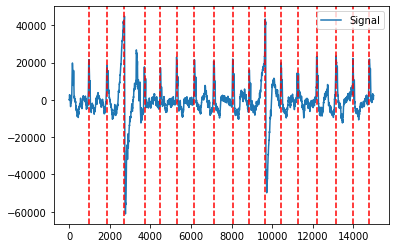

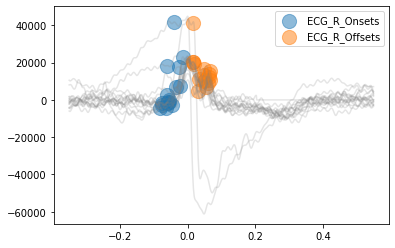

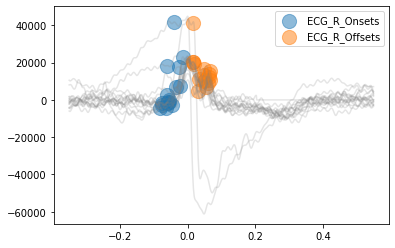

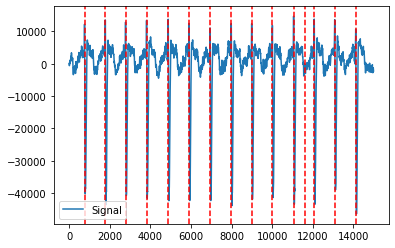

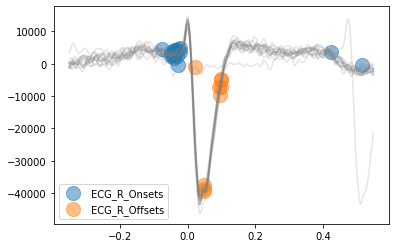

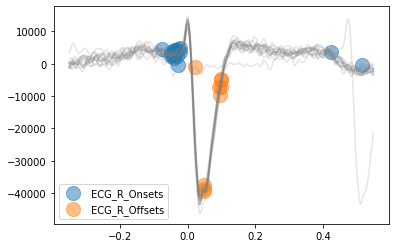

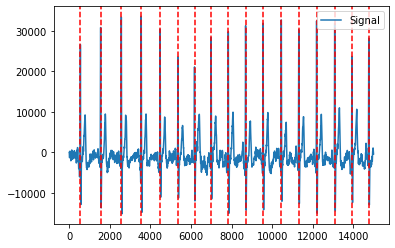

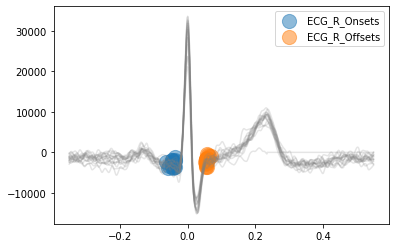

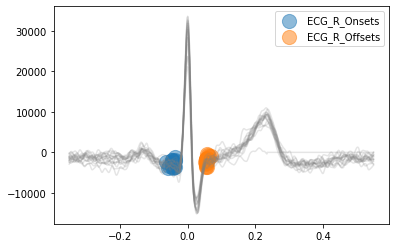

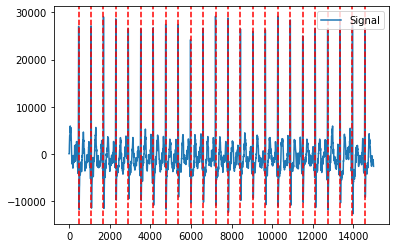

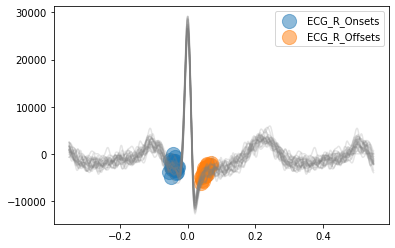

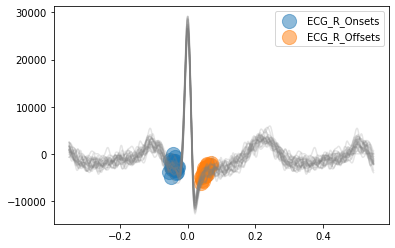

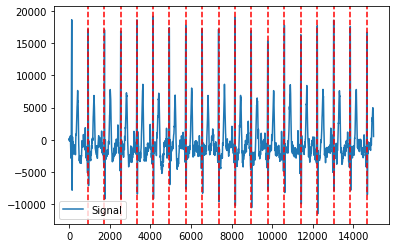

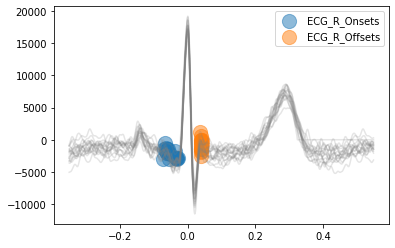

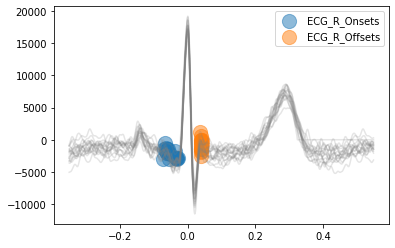

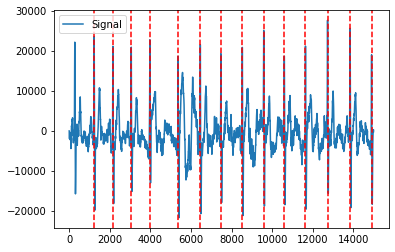

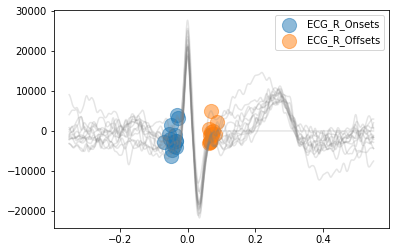

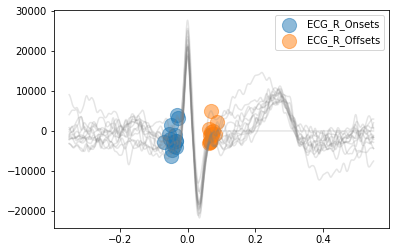

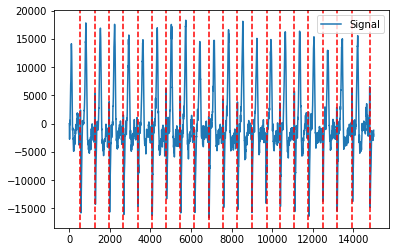

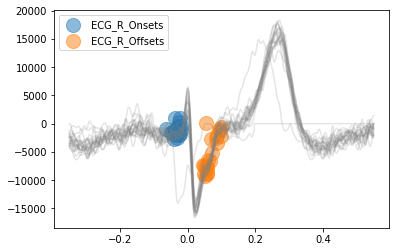

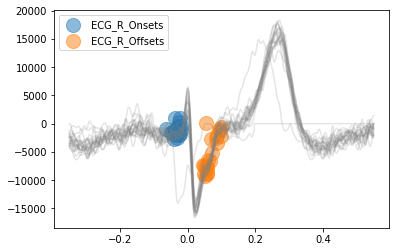

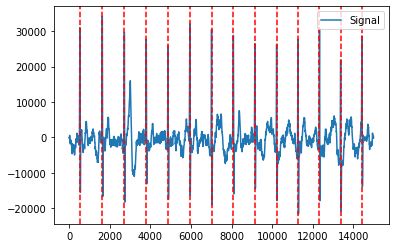

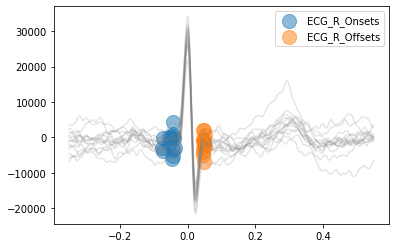

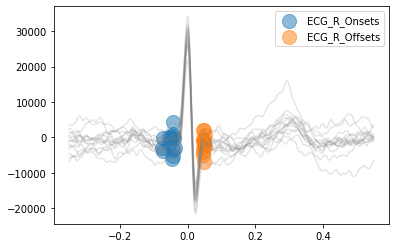

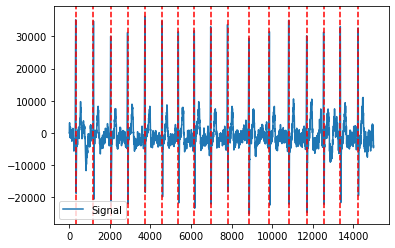

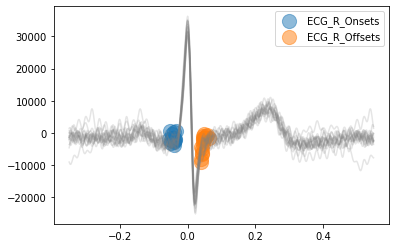

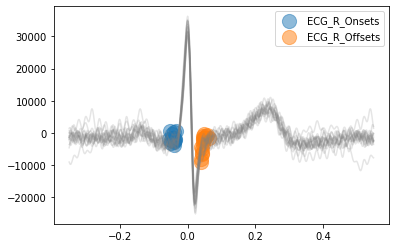

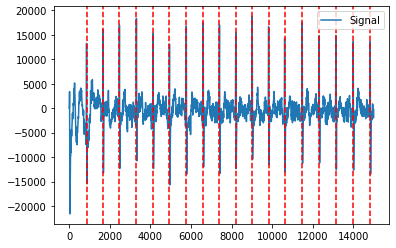

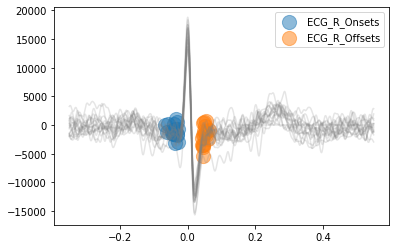

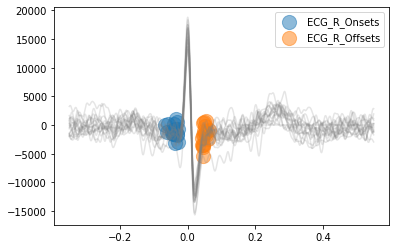

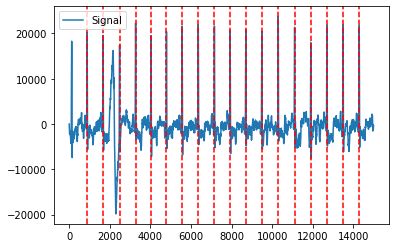

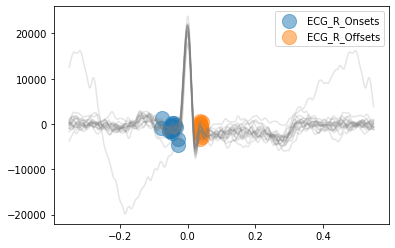

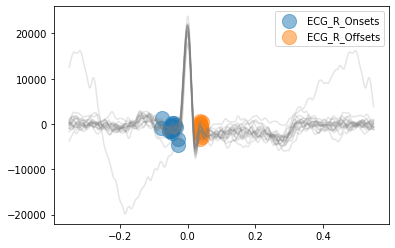

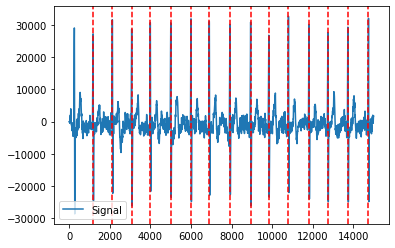

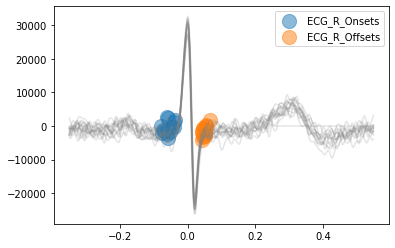

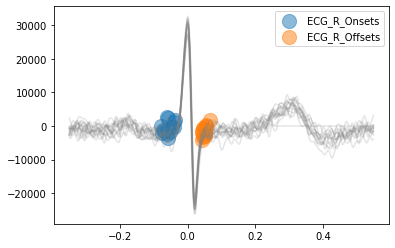

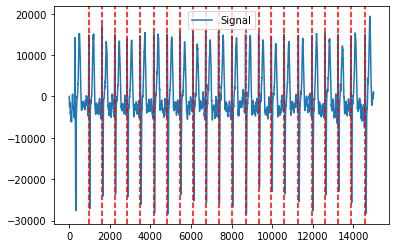

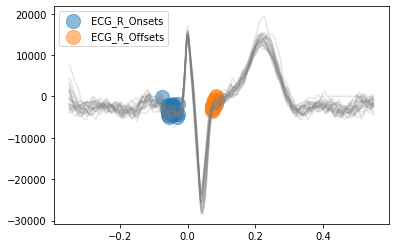

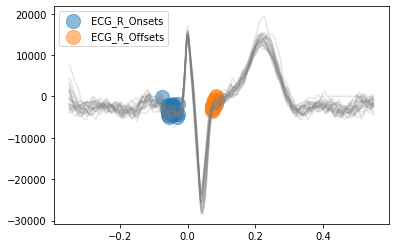

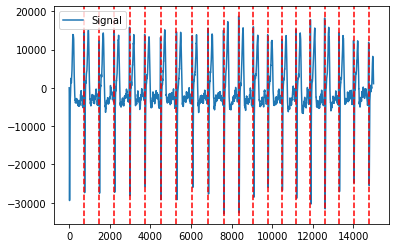

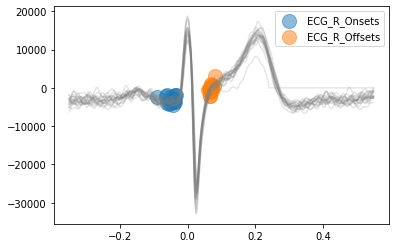

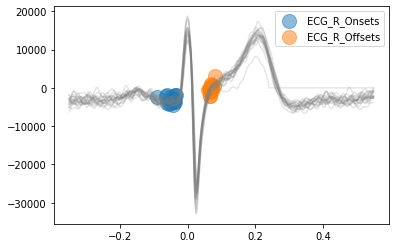

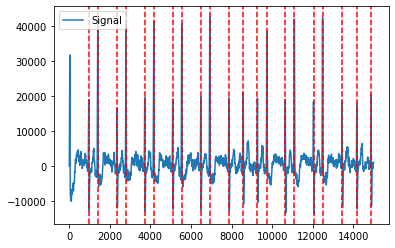

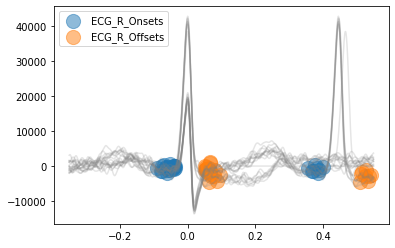

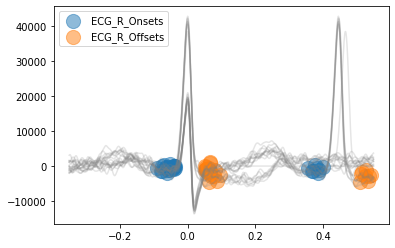

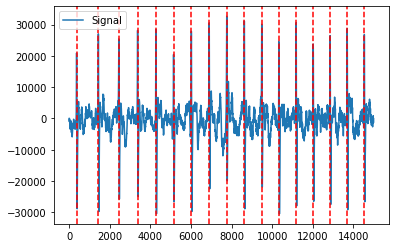

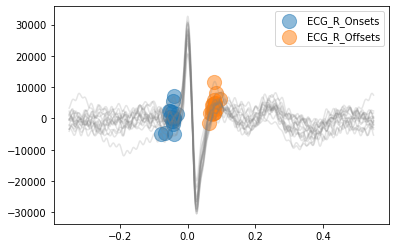

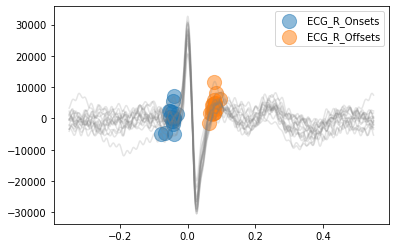

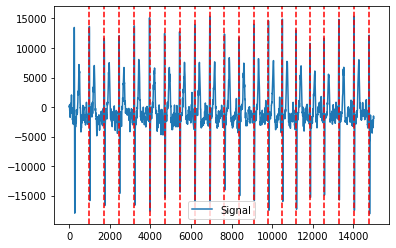

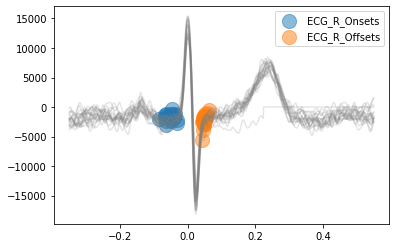

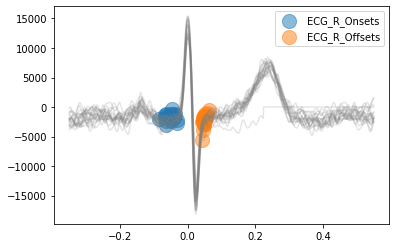

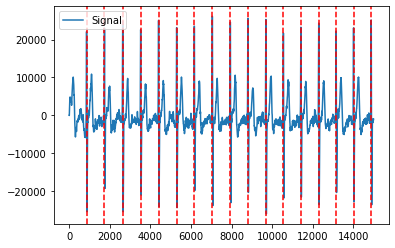

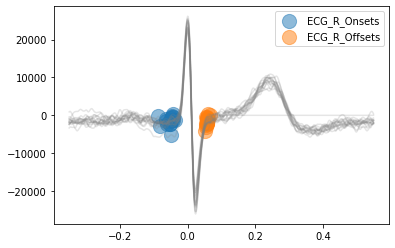

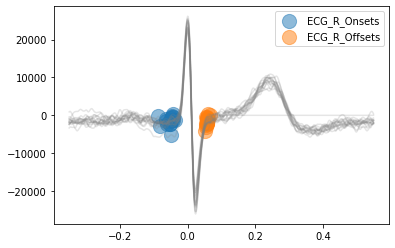

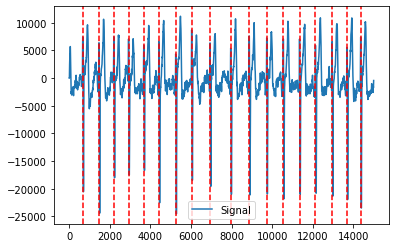

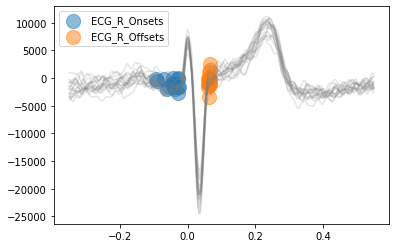

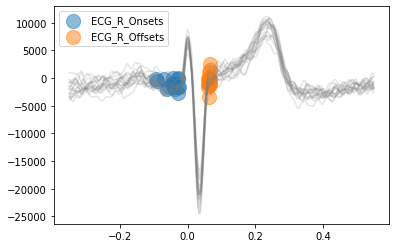

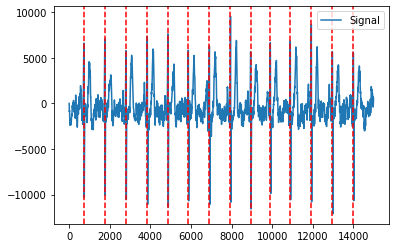

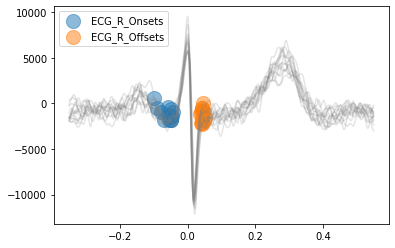

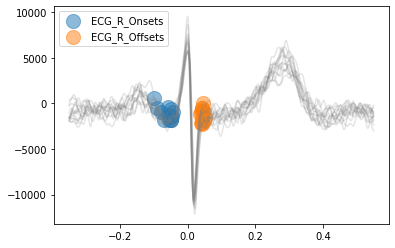

In [ ]:
global row, column, ts
row = 4; column = 3
macId=getMacId(row,column); print("MAC:",macId)
ts=gettimestamp(row,column); print("TS:",ts)

for m in range(4,24):
  macId=getMacId(m,column)
  ts=gettimestamp(m,column)
  Fs=1000
  ECG_Type = "12 Lead ECG"
  Patient_Details = ("\nTimestamp :  %d  \nMAC :  %s"%(ts,macId))
  start = 1000
  buffer = client.fetch(macId,ts); frame = buffer.frame
  Leadii= frame.ii; ii =Leadii*0.000286
  # V2=frame.v2;v2=V2*0.000286
  ecg_signal = ecg_filters(Leadii)
  _, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=Fs)

  # VISUZLIZE R-PEAKS IN ECG SIGNAL
  plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

  # ZOOMING INTO FIRST 5 R-PEAKS
  # plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

  # Visualize R-waves boundaries

  signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
  data = list(waves_cwt.items())
  an_array = np.array(data)
  print(an_array)
  signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
  data1 = list(waves_dwt.items())
  an_array1 = np.array(data)
  print(an_array1)
  # RR INTERVAL CALCULATIONS
  df = pd.DataFrame.from_dict(rpeaks); #print(df)
  peaklocation=df.ECG_R_Peaks
  RR_interval=np.zeros(len(peaklocation)-1)
  for i in range(1,len(peaklocation)):
    ch = peaklocation[i]-peaklocation[i-1]
    if ch<2000: RR_interval[i-1]=ch;
    for j in range (0,len(RR_interval)-1):
      if RR_interval[j]<=500:RR_interval[j]=np.mean([RR_interval[j-1],RR_interval[j+1]])
    avg_RR_interval=np.average(RR_interval)
    HeartRate=(60*Fs)/avg_RR_interval;
  print("avg_RR_interval",avg_RR_interval)


  # df = pd.DataFrame.from_dict(rpeaks); #print(df)
  # peaklocation=df.ECG_R_Peaks
  # RR_interval=[]
  # for i in range(1,len(peaklocation)):
  #   ch = peaklocation[i]-peaklocation[i-1]
  #   if ch>=300 and ch<=2000:
  #     RR_interval=int(ch)
  # print(RR_interval)

  signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt")
  signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="dwt")

  P_Onset=Value_axis(waves_dwt,1)
  R_Onset=Value_axis(waves_dwt,4)
  QRS_Offset=Value_axis(waves_cwt,5)
  QRS_Onset=Value_axis(waves_cwt,4)
  T_Offset=Value_axis(waves_cwt,9)
  T_Peaks=Value_axis(waves_cwt,8)


  QRS_interval=avg_intervalcalculation(QRS_Onset,QRS_Offset)
  PR_interval=avg_intervalcalculation(P_Onset,R_Onset)
  QT_interval=avg_intervalcalculation(QRS_Onset,T_Offset)
  # if QT_interval<300:
  T_Off = []
  for i in range(len(T_Peaks)):
      st_p=T_Peaks[i]
      #print(st_p)
      en_p=T_Peaks[i]+200
      counter=0
  for j in range(st_p,en_p):
        counter=counter+1
        if(ecg_signal[j]<0):
          #counter=counter+1
          T_Off.append(st_p+counter)
          #print(counter)
          break
  print("T_Off",T_Off)
  # QT_interval=avg_intervalcalculation(QRS_Onset,T_Off)

  print('QRS duration',int(QRS_interval))
  print('PR_duration',int(PR_interval))
  print('QT duration',int(QT_interval))
  QTc=(QT_interval+1.75*(HeartRate-60))
  print("QTc interval",int(QTc))
 ###    UPDATING DATA IN SHEET     #####
  sbs.update_cell(m,column+4,str(QT_interval)) 
  sbs.update_cell(m,column+5, str(QTc))
  sbs.update_cell(m,column+2,str(QRS_interval))
  sbs.update_cell(m,column+3,str(PR_interval))
  print(m)

 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


[['ECG_P_Onsets'
  list([2064, 3075, 4032, 5028, 6035, 7016, 7993, 9022, 9997, 10987, 11967, 12961, 13915])]
 ['ECG_P_Peaks'
  list([2078, 3101, 4048, 5046, 6056, 7032, 8019, 9060, 10029, 11014, 11986, 12986, 13954])]
 ['ECG_P_Offsets'
  list([2128, nan, 4074, 5088, 6104, 7049, 8035, nan, 10072, 11062, 12043, 13000, 13965])]
 ['ECG_Q_Peaks'
  list([1162, 2162, 3166, 4151, 5147, 6147, 7138, 8122, 9108, 10090, 11109, 12104, 13078, 14052])]
 ['ECG_R_Onsets'
  list([1149, 2154, 3157, 4144, 5138, 6140, 7131, 8113, 9125, 10116, 11100, 12094, 13066, 14068])]
 ['ECG_R_Offsets'
  list([1255, 2250, 3239, 4235, 5229, 6223, 7213, 8207, 9201, 10194, 11186, 12182, 13175, 14166])]
 ['ECG_S_Peaks'
  list([1239, 2231, 3224, 4217, 5214, 6205, 7192, 8189, 9183, 10177, 11173, 12163, 13154, 14152])]
 ['ECG_T_Onsets'
  list([1310, 2155, 3153, 4146, 5246, 6122, 7310, 8296, 9107, 10091, 11317, 12084, 13084])]
 ['ECG_T_Peaks'
  list([1337, 2201, 3191, 4186, 5295, 6181, 7365, 8335, 9157, 10146, 11336, 12135, 13

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[['ECG_P_Onsets'
  list([2064, 3075, 4032, 5028, 6035, 7016, 7993, 9022, 9997, 10987, 11967, 12961, 13915])]
 ['ECG_P_Peaks'
  list([2078, 3101, 4048, 5046, 6056, 7032, 8019, 9060, 10029, 11014, 11986, 12986, 13954])]
 ['ECG_P_Offsets'
  list([2128, nan, 4074, 5088, 6104, 7049, 8035, nan, 10072, 11062, 12043, 13000, 13965])]
 ['ECG_Q_Peaks'
  list([1162, 2162, 3166, 4151, 5147, 6147, 7138, 8122, 9108, 10090, 11109, 12104, 13078, 14052])]
 ['ECG_R_Onsets'
  list([1149, 2154, 3157, 4144, 5138, 6140, 7131, 8113, 9125, 10116, 11100, 12094, 13066, 14068])]
 ['ECG_R_Offsets'
  list([1255, 2250, 3239, 4235, 5229, 6223, 7213, 8207, 9201, 10194, 11186, 12182, 13175, 14166])]
 ['ECG_S_Peaks'
  list([1239, 2231, 3224, 4217, 5214, 6205, 7192, 8189, 9183, 10177, 11173, 12163, 13154, 14152])]
 ['ECG_T_Onsets'
  list([1310, 2155, 3153, 4146, 5246, 6122, 7310, 8296, 9107, 10091, 11317, 12084, 13084])]
 ['ECG_T_Peaks'
  list([1337, 2201, 3191, 4186, 5295, 6181, 7365, 8335, 9157, 10146, 11336, 12135, 13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


T_Off [13142]
QRS duration 90
PR_duration 240
QT duration 134
QTc interval 134


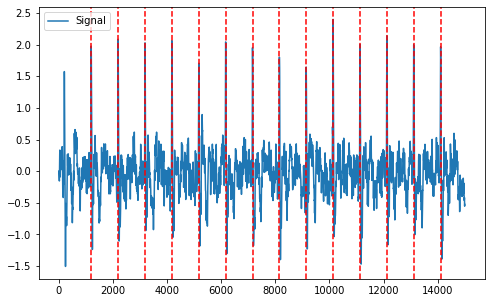

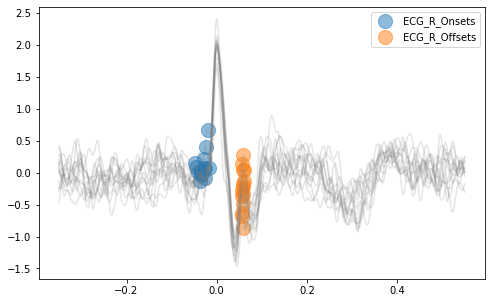

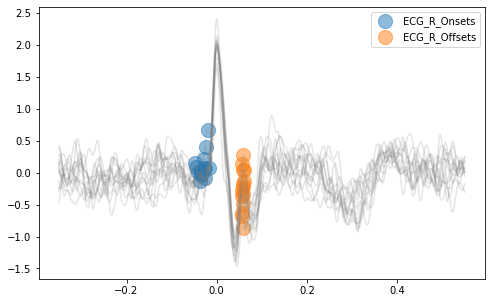

In [ ]:
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=Fs)

# VISUZLIZE R-PEAKS IN ECG SIGNAL
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# ZOOMING INTO FIRST 5 R-PEAKS
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

# Visualize R-waves boundaries

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
data = list(waves_cwt.items())
an_array = np.array(data)
print(an_array)
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt", show=True, show_type='bounds_R')
data1 = list(waves_dwt.items())
an_array1 = np.array(data)
print(an_array1)
# RR INTERVAL CALCULATIONS
df = pd.DataFrame.from_dict(rpeaks); #print(df)
peaklocation=df.ECG_R_Peaks
RR_interval=np.zeros(len(peaklocation)-1)
for i in range(1,len(peaklocation)):
  ch = peaklocation[i]-peaklocation[i-1]
  if ch<2000: RR_interval[i-1]=ch;
  for j in range (0,len(RR_interval)-1):
    if RR_interval[j]<=500:RR_interval[j]=np.mean([RR_interval[j-1],RR_interval[j+1]])
  avg_RR_interval=np.average(RR_interval)
  HeartRate=(60*Fs)/avg_RR_interval;
print("avg_RR_interval",avg_RR_interval)


# df = pd.DataFrame.from_dict(rpeaks); #print(df)
# peaklocation=df.ECG_R_Peaks
# RR_interval=[]
# for i in range(1,len(peaklocation)):
#   ch = peaklocation[i]-peaklocation[i-1]
#   if ch>=300 and ch<=2000:
#     RR_interval=int(ch)
# print(RR_interval)

signal_cwt, waves_cwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="cwt")
signal_dwt, waves_dwt = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=Fs, method="dwt")

P_Onset=Value_axis(waves_dwt,1)
R_Onset=Value_axis(waves_dwt,4)
QRS_Offset=Value_axis(waves_cwt,5)
QRS_Onset=Value_axis(waves_cwt,4)
T_Offset=Value_axis(waves_cwt,9)
T_Peaks=Value_axis(waves_cwt,8)


QRS_interval=avg_intervalcalculation(QRS_Onset,QRS_Offset)
PR_interval=avg_intervalcalculation(P_Onset,R_Onset)
QT_interval=avg_intervalcalculation(QRS_Onset,T_Offset)
# if QT_interval<300:
T_Off = []
for i in range(len(T_Peaks)):
    st_p=T_Peaks[i]
    #print(st_p)
    en_p=T_Peaks[i]+200
    counter=0
for j in range(st_p,en_p):
      counter=counter+1
      if(ecg_signal[j]<0):
        #counter=counter+1
        T_Off.append(st_p+counter)
        #print(counter)
        break
print("T_Off",T_Off)
# QT_interval=avg_intervalcalculation(QRS_Onset,T_Off)

print('QRS duration',int(QRS_interval))
print('PR_duration',int(PR_interval))
print('QT duration',int(QT_interval))
QTc=(QT_interval+1.75*(HeartRate-60))
print("QTc interval",int(QTc))
